In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [16]:
#Read in our csv file
dat = pd.read_csv('../module_8/module8_WBB.csv',sep=',',skiprows=6,index_col=1,parse_dates=True)

#Decompose wind into u- and v-components incase we do any sort of time averaging...
u = -1*dat['wind_speed_set_1']*np.sin(dat['wind_direction_set_1']*(np.pi/180))
v = -1*dat['wind_speed_set_1']*np.cos(dat['wind_direction_set_1']*(np.pi/180))
    
dat['u_wind'] = u
dat['v_wind'] = v


print(dat)

                          Station_ID  air_temp_set_1  relative_humidity_set_1  \
Date_Time                                                                       
2011-11-30 12:00:00-07:00        WBB           41.83                    65.03   
2011-11-30 12:05:00-07:00        WBB           42.15                    63.24   
2011-11-30 12:10:00-07:00        WBB           42.40                    62.89   
2011-11-30 12:15:00-07:00        WBB           41.92                    64.74   
2011-11-30 12:20:00-07:00        WBB           41.61                    65.40   
...                              ...             ...                      ...   
2011-12-02 11:40:00-07:00        WBB           35.74                    42.71   
2011-12-02 11:45:00-07:00        WBB           34.97                    43.94   
2011-12-02 11:50:00-07:00        WBB           36.59                    41.50   
2011-12-02 11:55:00-07:00        WBB           37.33                    40.51   
2011-12-02 12:00:00-07:00   

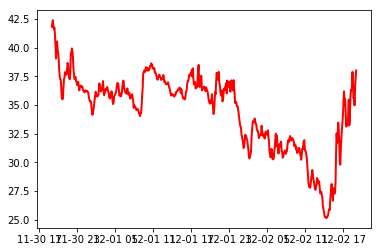

In [17]:
#Make a plot of temperature from our pandas dataframe, which we just read in
plt.plot(dat['air_temp_set_1'], color="red", linestyle = "-",linewidth=2,label="Temp [F]")
plt.show()

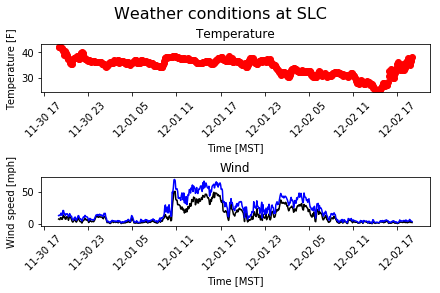

In [18]:
#Can we panel air temperature and wind speed?
fig, axs = plt.subplots(2, 1,constrained_layout=True)
axs[0].plot(dat['air_temp_set_1'],color="red", marker = "o",linewidth=0)
axs[0].set_title('Temperature')
axs[0].tick_params(axis='x', labelrotation = 45)
axs[0].set_xlabel('Time [MST]')
axs[0].set_ylabel('Temperature [F]')
fig.suptitle('Weather conditions at SLC', fontsize=16)

axs[1].plot(dat['wind_speed_set_1'],color="black", linestyle = "-")
axs[1].plot(dat['wind_gust_set_1'],color="blue", linestyle = "-")
axs[1].set_xlabel('Time [MST]')
axs[1].set_title('Wind')
axs[1].set_ylabel('Wind speed [mph]')
axs[1].tick_params(axis='x', labelrotation = 45)
plt.show()

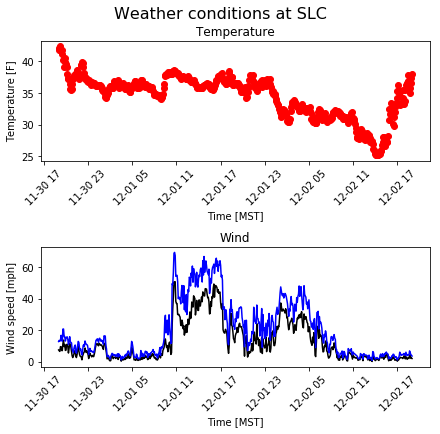

In [19]:
#Can we panel air temperature and wind speed?
fig, axs = plt.subplots(2, 1,figsize=(6,6),constrained_layout=True)
axs[0].plot(dat['air_temp_set_1'],color="red", marker = "o",linewidth=0)
axs[0].set_title('Temperature')
axs[0].tick_params(axis='x', labelrotation = 45)
axs[0].set_xlabel('Time [MST]')
axs[0].set_ylabel('Temperature [F]')
fig.suptitle('Weather conditions at SLC', fontsize=16)

axs[1].plot(dat['wind_speed_set_1'],color="black", linestyle = "-")
axs[1].plot(dat['wind_gust_set_1'],color="blue", linestyle = "-")
axs[1].set_xlabel('Time [MST]')
axs[1].set_title('Wind')
axs[1].set_ylabel('Wind speed [mph]')
axs[1].tick_params(axis='x', labelrotation = 45)
plt.show()
    

<br>

That is *windy*! Where were these strong winds coming from? Lets plot up some wind directions. Preferably on the same plot. However, if we plot this up on our wind speed axis, it would likely stretch the y axis limit to 360 degrees, which is not ideal. We need to plot this on the same figure, but on a different axis... How do we do this?


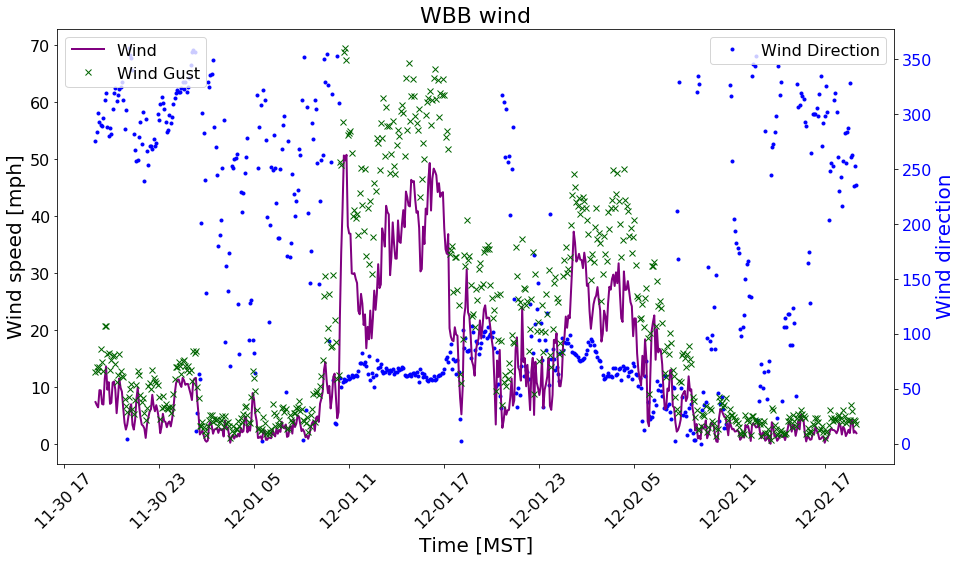

In [20]:
#Make another plot...
fig, ax1 = plt.subplots(figsize=(15,8))

ax1.plot(dat['wind_speed_set_1'], color="purple", linestyle = "-",linewidth=2,label="Wind")
ax1.plot(dat['wind_gust_set_1'], color="darkgreen", marker="x",linewidth=0,label="Wind Gust")
ax1.tick_params(axis='x',rotation=45,labelsize=16)
ax1.tick_params(axis='y',labelsize=16)
ax1.set_xlabel('Time [MST]',fontsize=20)
ax1.set_ylabel('Wind speed [mph]',fontsize=20) 
ax1.set_title('WBB wind',fontsize=22)
ax1.legend(loc="upper left",fontsize=16)
ax2 = ax1.twinx()

ax2.plot(dat['wind_direction_set_1'], color="blue", marker=".",linewidth=0,label="Wind Direction")
ax2.set_ylabel('Wind direction',fontsize=20,color="blue")
ax2.tick_params(axis='y', labelcolor="blue",labelsize=16)
ax2.legend(loc="upper right",fontsize=16)

#Overlays legends on points
ax1.set_zorder(1) # make it on top
ax1.set_frame_on(False) # make it transparent
ax2.set_frame_on(True) #
plt.show()


